In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline    

## Haar feature-based cascade classifier

In [9]:
def face_detect_haar(img_path):
    face_haar = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))

    # get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()

Number of faces detected: 0


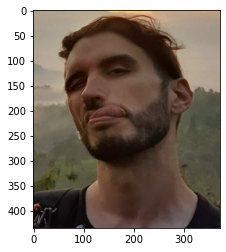

In [10]:
face_detect_haar('tommy.png')

Number of faces detected: 2


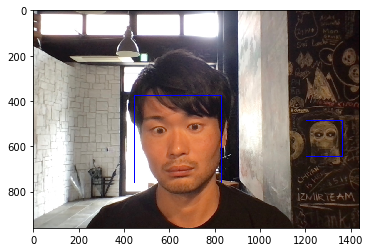

In [11]:
face_detect_haar('nori.png')

## CNN - Caffe-based face detetor

In [28]:
def face_detect_cnn(img_path,boundary=0.7):
    net = cv2.dnn.readNetFromCaffe('deploy.prototxt','res10_300x300_ssd_iter_140000_fp16.caffemodel')
    img = cv2.imread(img_path)
    (h, w) = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300,300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    faces = 0
    for i in range(0,detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        if confidence > boundary:
            faces += 1
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(img, (startX, startY), (endX, endY),(0, 0, 255), 2)
            cv2.putText(img, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    
    print('Number of faces detected:{}'.format(faces))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show
    

Number of faces detected:1


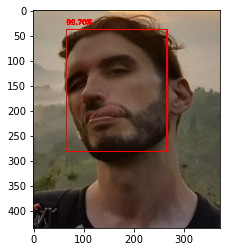

In [29]:
face_detect_cnn('tommy.png')

Number of faces detected:1


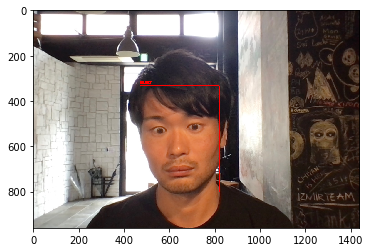

In [30]:
face_detect_cnn('nori.png')